# NoteBook Portafolio de Inversion

### Lectura de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.optimize import minimize


In [2]:
import yfinance as yf
import pandas as pd

# Lista de símbolos de acciones
symbols = ['BOGOTA.CL', 'BCOLOMBIA.CL', 'CELSIA.CL', 'GEB.CL', 'CEMARGOS.CL', 'CORFICOLCF.CL', 'EXITO.CL', 'ISA.CL', 'MINEROS.CL', 'PFDAVVNDA.CL', 'PFBCOLOM.CL', 'PROMIGAS.CL', 'TERPEL.CL' ]

# Crear un diccionario para almacenar los datos de cierre de cada acción
historical_data = {}

# Obtener los datos históricos de cierre para cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    historical_data[symbol] = ticker.history(period='1y')['Close']

# Crear un DataFrame a partir del diccionario
df_inicial = pd.DataFrame(historical_data)

df_inicial.tail(5)




,BOGOTA.CL,BCOLOMBIA.CL,CELSIA.CL,GEB.CL,CEMARGOS.CL,CORFICOLCF.CL,EXITO.CL,ISA.CL,MINEROS.CL,PFDAVVNDA.CL,PFBCOLOM.CL,PROMIGAS.CL,TERPEL.CL
Date,,,,,,,,,,,,,
2024-03-12 00:00:00-04:00,31300.0,31900.0,3900.0,2300.0,7400.0,13640.0,2360.0,17640.0,2550.0,20400.0,31900.0,5150.0,8440.0
2024-03-13 00:00:00-04:00,30860.0,31800.0,3880.0,2280.0,7780.0,13480.0,2365.0,18500.0,2550.0,20420.0,31880.0,5210.0,8460.0
2024-03-14 00:00:00-04:00,29900.0,31700.0,3835.0,2200.0,7750.0,13200.0,2300.0,19200.0,2695.0,20380.0,31520.0,5220.0,8400.0
2024-03-15 00:00:00-04:00,27500.0,31700.0,3500.0,2080.0,8200.0,13040.0,2265.0,19960.0,2630.0,19100.0,31400.0,5160.0,8230.0
2024-03-18 00:00:00-04:00,27520.0,32800.0,3700.0,2175.0,7900.0,13680.0,2335.0,19700.0,2600.0,20100.0,32160.0,5310.0,8280.0


In [3]:
#Si se desea excluir alguna accion por conocimiento Mercado

df_inicial = df_inicial.drop('EXITO.CL', axis=1)

In [4]:
print(df_inicial.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-03-20 00:00:00-04:00 to 2024-03-18 00:00:00-04:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BOGOTA.CL      259 non-null    float64
 1   BCOLOMBIA.CL   259 non-null    float64
 2   CELSIA.CL      259 non-null    float64
 3   GEB.CL         259 non-null    float64
 4   CEMARGOS.CL    259 non-null    float64
 5   CORFICOLCF.CL  259 non-null    float64
 6   ISA.CL         259 non-null    float64
 7   MINEROS.CL     259 non-null    float64
 8   PFDAVVNDA.CL   259 non-null    float64
 9   PFBCOLOM.CL    259 non-null    float64
 10  PROMIGAS.CL    259 non-null    float64
 11  TERPEL.CL      259 non-null    float64
dtypes: float64(12)
memory usage: 26.3 KB
None


<Figure size 1000x600 with 0 Axes>

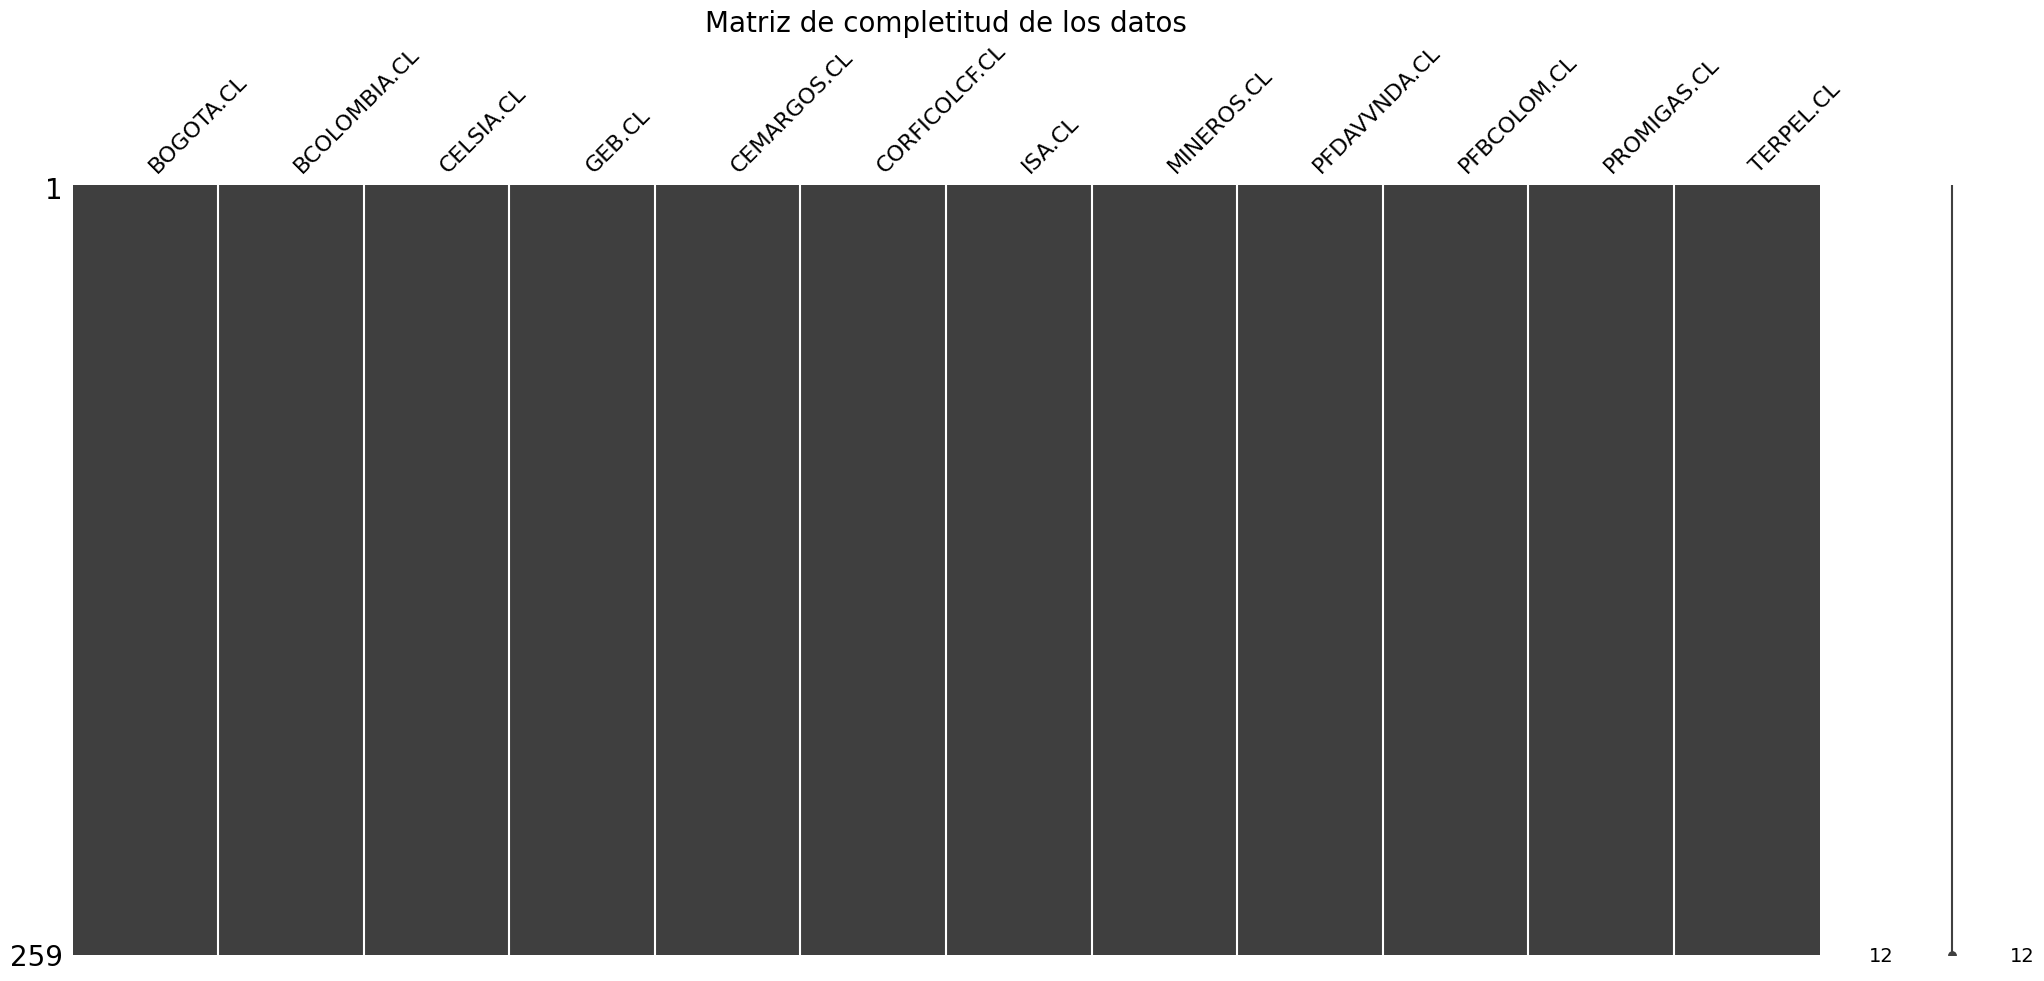

c:\Users\yjimenez\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Figure size 1000x600 with 0 Axes>

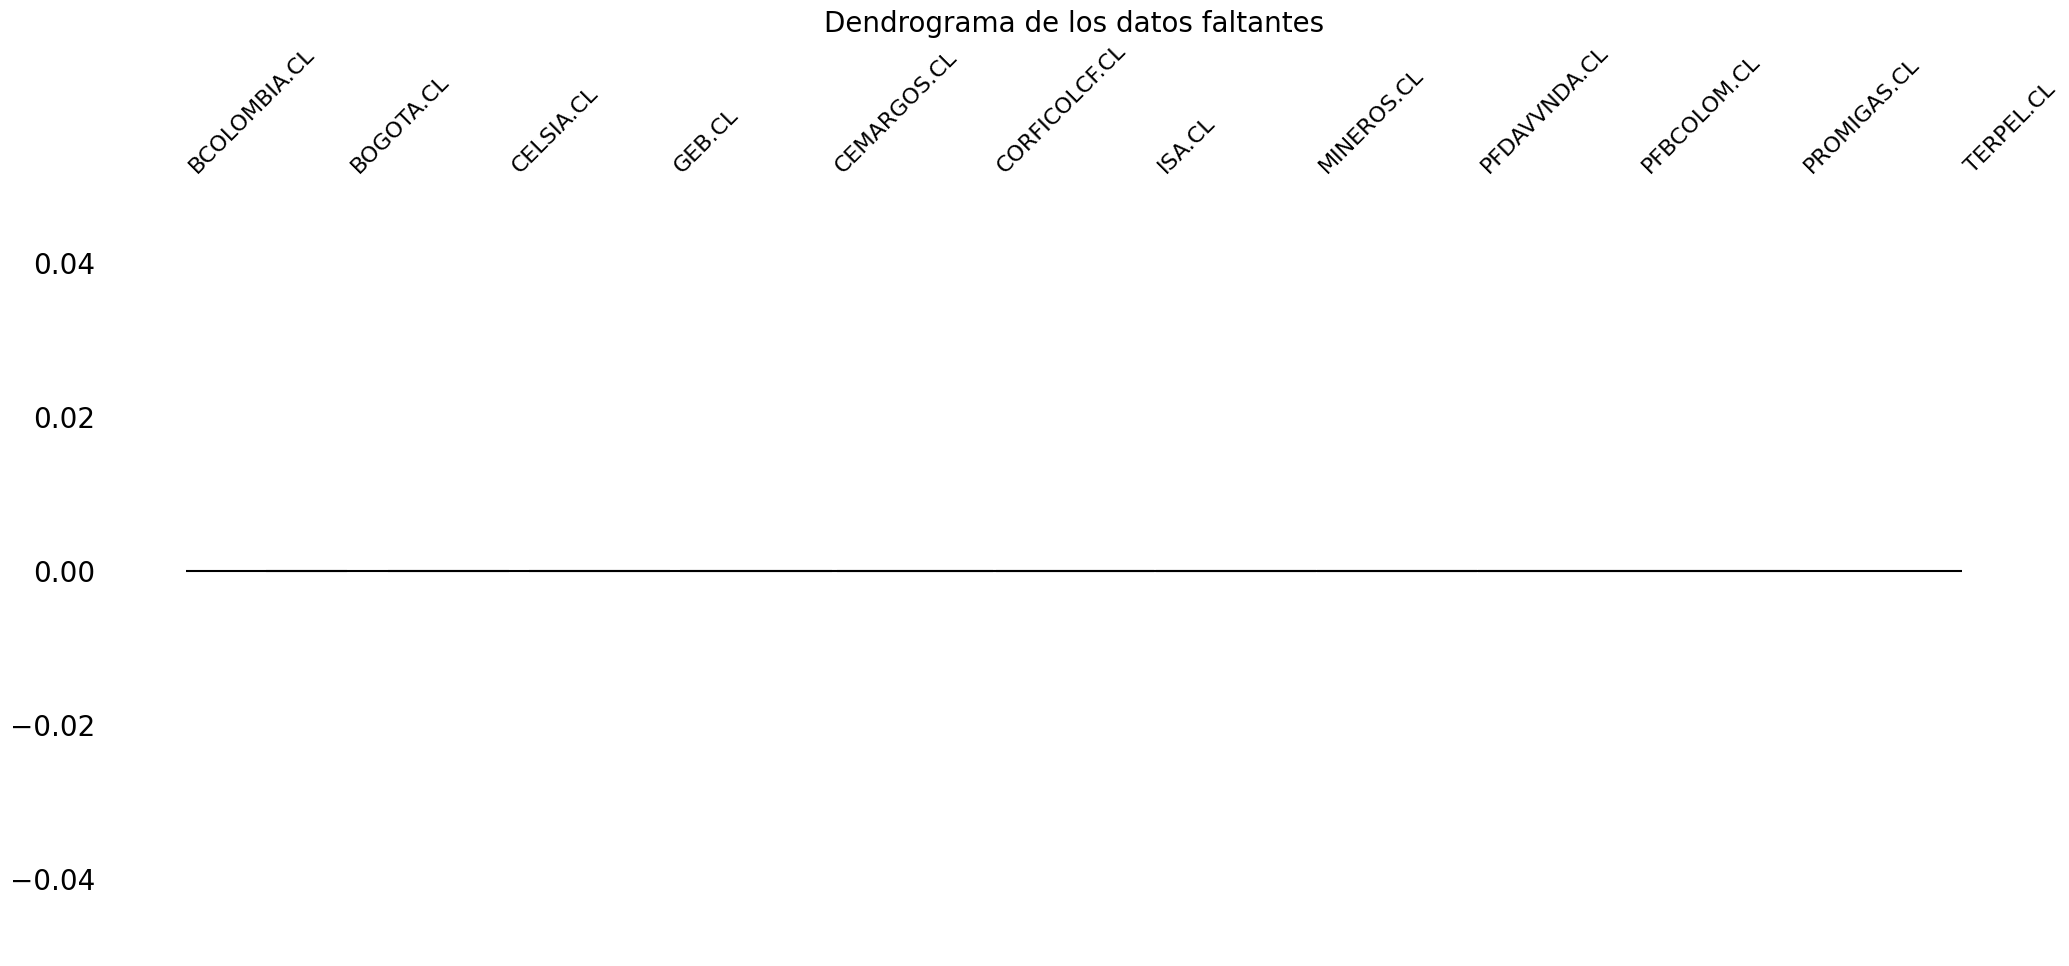

BOGOTA.CL        0
BCOLOMBIA.CL     0
CELSIA.CL        0
GEB.CL           0
CEMARGOS.CL      0
CORFICOLCF.CL    0
ISA.CL           0
MINEROS.CL       0
PFDAVVNDA.CL     0
PFBCOLOM.CL      0
PROMIGAS.CL      0
TERPEL.CL        0
dtype: int64


In [5]:
# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(df_inicial)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(df_inicial)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(df_inicial.isnull().sum())


Calcular la matriz de correlación

In [6]:
correlacion = df_inicial.corr()
correlacion

,BOGOTA.CL,BCOLOMBIA.CL,CELSIA.CL,GEB.CL,CEMARGOS.CL,CORFICOLCF.CL,ISA.CL,MINEROS.CL,PFDAVVNDA.CL,PFBCOLOM.CL,PROMIGAS.CL,TERPEL.CL
BOGOTA.CL,1.000000,0.461855,0.590846,0.334000,-0.030436,0.363212,0.762575,0.641399,0.745216,0.374587,0.311075,0.634297
BCOLOMBIA.CL,0.461855,1.000000,0.665123,0.538480,0.443370,0.414529,0.493463,0.378414,0.570521,0.792230,0.466736,0.686729
CELSIA.CL,0.590846,0.665123,1.000000,0.840730,0.712384,0.535538,0.657840,0.687673,0.563404,0.878876,0.786720,0.890102
GEB.CL,0.334000,0.538480,0.840730,1.000000,0.856781,0.772791,0.578851,0.312224,0.225909,0.884894,0.905099,0.734215
CEMARGOS.CL,-0.030436,0.443370,0.712384,0.856781,1.000000,0.496498,0.221802,0.169981,-0.075808,0.787932,0.743815,0.525950
CORFICOLCF.CL,0.363212,0.414529,0.535538,0.772791,0.496498,1.000000,0.593629,0.083783,0.237328,0.652679,0.805975,0.501084
ISA.CL,0.762575,0.493463,0.657840,0.578851,0.221802,0.593629,1.000000,0.570412,0.589001,0.555862,0.535085,0.682117
MINEROS.CL,0.641399,0.378414,0.687673,0.312224,0.169981,0.083783,0.570412,1.000000,0.658699,0.405390,0.338722,0.656862
PFDAVVNDA.CL,0.745216,0.570521,0.563404,0.225909,-0.075808,0.237328,0.589001,0.658699,1.000000,0.407984,0.299026,0.739425
PFBCOLOM.CL,0.374587,0.792230,0.878876,0.884894,0.787932,0.652679,0.555862,0.405390,0.407984,1.000000,0.831770,0.796447


Grafico de Correlacion

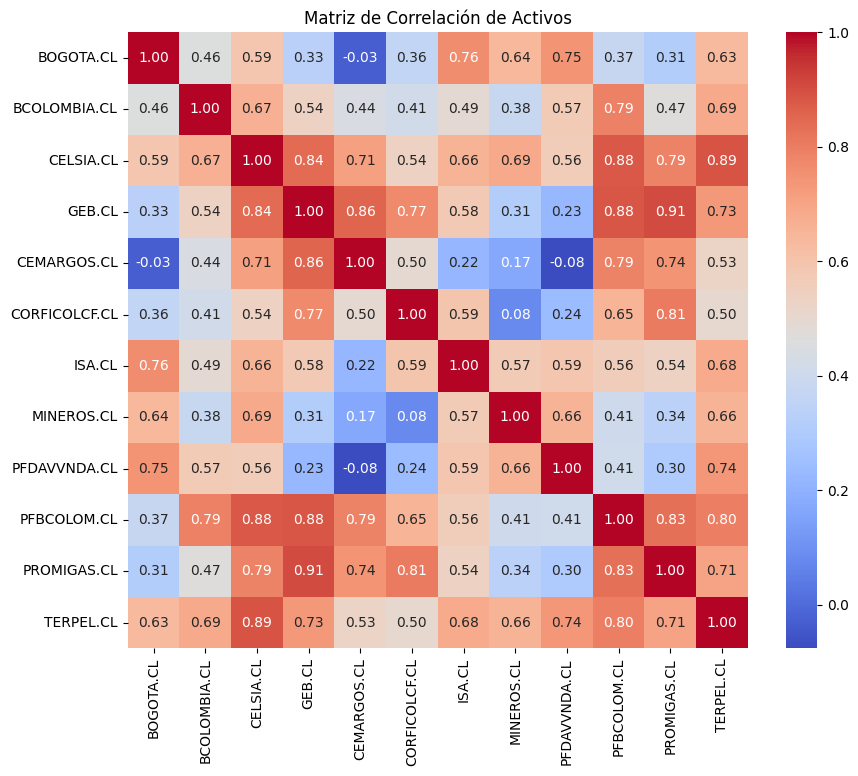

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos')
plt.show()


                           CEMARGOS.CL  PFDAVVNDA.CL     BOGOTA.CL  \
Date                                                                 
2023-03-20 00:00:00-04:00  2758.005371  21876.166016  26616.794922   
2023-03-21 00:00:00-04:00  2801.242920  21400.597656  25937.060547   
2023-03-22 00:00:00-04:00  2772.724365  21448.154297  26384.255859   
2023-03-23 00:00:00-04:00  2768.124756  20554.083984  26261.750000   
2023-03-24 00:00:00-04:00  2755.245605  20925.027344  25749.244141   

                           BCOLOMBIA.CL    CELSIA.CL  
Date                                                  
2023-03-20 00:00:00-04:00  28089.009766  2572.049561  
2023-03-21 00:00:00-04:00  28983.564453  2528.700439  
2023-03-22 00:00:00-04:00  29430.839844  2465.482666  
2023-03-23 00:00:00-04:00  29377.167969  2519.669434  
2023-03-24 00:00:00-04:00  30414.851562  2483.544922  


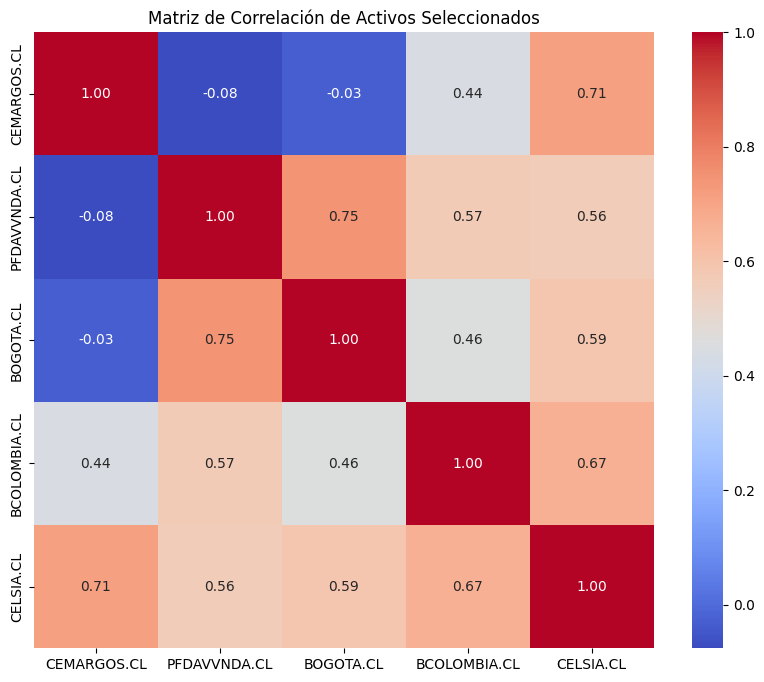

In [8]:
# Seleccionar las variables con correlación cercana a cero
low_corr_vars = correlacion[(correlacion > -0.1) & (correlacion < 0.1)].sum().sort_values().index[:5]

# Obtener el subconjunto de variables no correlacionadas
df_sincorrelacion = df_inicial[low_corr_vars]

# Mostrar las variables seleccionadas
print(df_sincorrelacion.head())

# Visualizar la nueva matriz de correlación de las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.heatmap(df_sincorrelacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos Seleccionados')
plt.show()


Calculo de la volatilidad simple

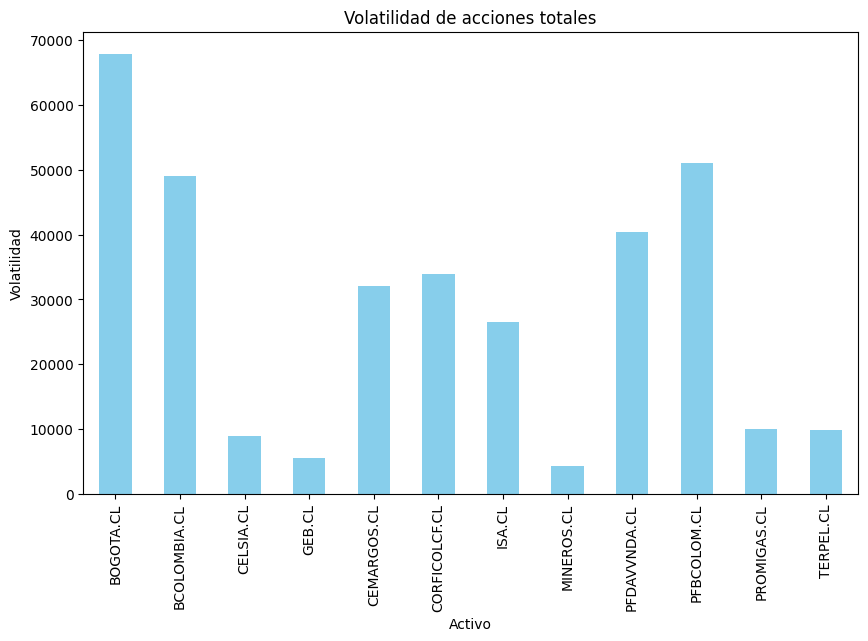

In [9]:
# Calcular la volatilidad (desviación estándar) de cada activo
volatilidad = df_inicial.std()*21
volatilidad
# Crear un gráfico de barras para la volatilidad de cada activo
plt.figure(figsize=(10, 6))
volatilidad.plot(kind='bar', color='skyblue')
plt.title('Volatilidad de acciones totales')
plt.xlabel('Activo')
plt.ylabel('Volatilidad')
plt.xticks(rotation=90)
plt.show()

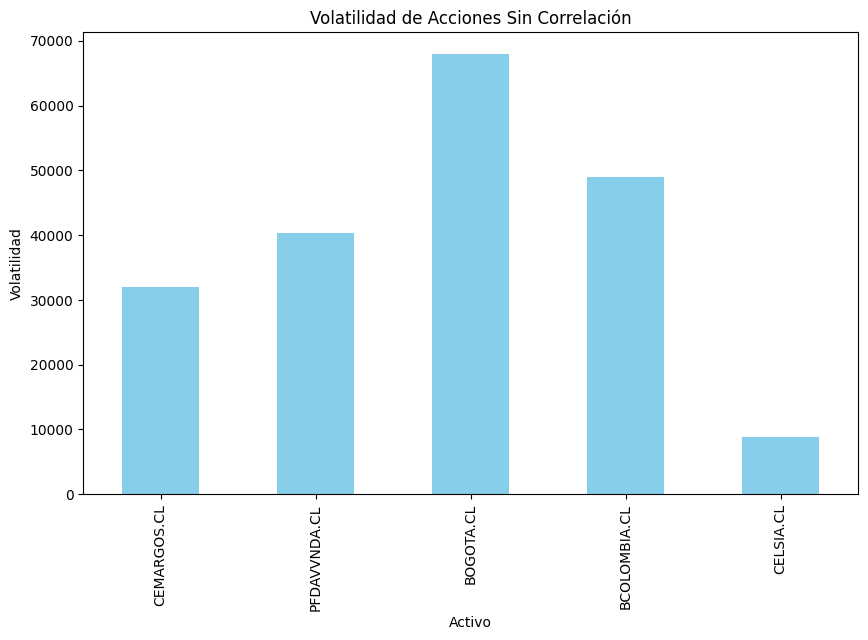

In [10]:
# Calcular la volatilidad (desviación estándar) de cada activo
volatilidad = df_sincorrelacion.std()*21
volatilidad
# Crear un gráfico de barras para la volatilidad de cada activo
plt.figure(figsize=(10, 6))
volatilidad.plot(kind='bar', color='skyblue')
plt.title('Volatilidad de Acciones Sin Correlación')
plt.xlabel('Activo')
plt.ylabel('Volatilidad')
plt.xticks(rotation=90)
plt.show()

Análisis de volatilidad y rendimiento desde formulacion en python

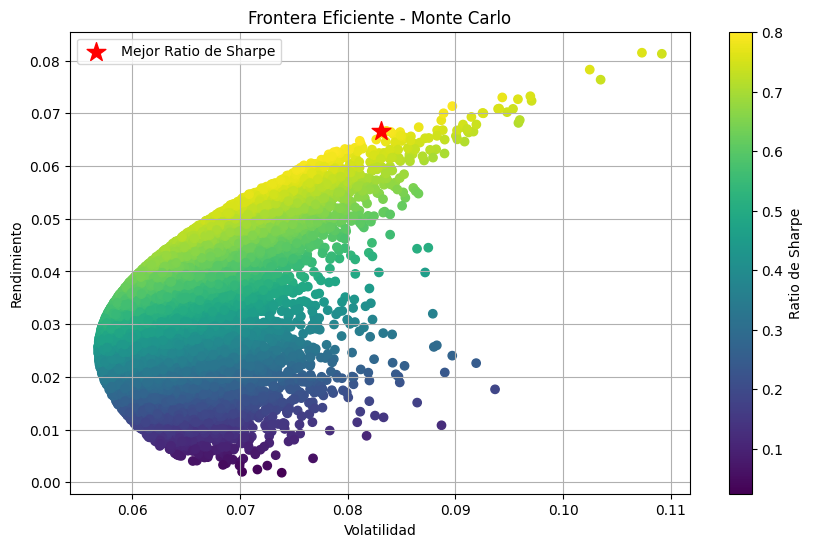

In [60]:
# Calcular los rendimientos diarios
returns = df_sincorrelacion.dropna().pct_change()

# Calcular la matriz de covarianza
cov_matrix = returns.cov()

# Número de simulaciones de Monte Carlo
num_portfolios = 50000

# Almacenar los resultados de rendimiento y volatilidad
results = np.zeros((3, num_portfolios))

# Simular múltiples portafolios
for i in range(num_portfolios):
    # Generar pesos aleatorios
    weights = np.random.random(len(df_sincorrelacion.columns))
    weights /= np.sum(weights)  # Normalizar para que la suma sea 1

    # Calcular rendimiento y volatilidad horizonte tiempo 1 mes
    portfolio_return = np.sum(returns.mean() * weights) * 21
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(21)

    # Almacenar rendimiento, volatilidad y pesos
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Ratio de Sharpe

# Encontrar el portafolio con el mejor ratio de Sharpe
max_sharpe_index = np.argmax(results[2])
best_return = results[0, max_sharpe_index]
best_volatility = results[1, max_sharpe_index]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(best_volatility, best_return, marker='*', color='r', s=200, label='Mejor Ratio de Sharpe')
plt.title('Frontera Eficiente - Monte Carlo')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# calcular el rendimiento y volatilidad del portafolio óptimo
Radio_de_sharpe = best_return/best_volatility
print(f"Rendimiento óptimo: {best_return * 100:.2f}%")
print(f"Volatilidad óptima: {best_volatility * 100:.2f}%")
print(f"Rendimiento de Sharpe: {Radio_de_sharpe}")

Rendimiento óptimo: 6.66%
Volatilidad óptima: 8.31%
Rendimiento de Sharpe: 0.8009679653533677


In [62]:
# Mostrar los pesos óptimos del portafolio con el mejor ratio de Sharpe
best_weights = np.round(np.array([weights]), 4)
print("Pesos óptimos del portafolio con el mejor ratio de Sharpe:")
for i in range(len(df_sincorrelacion.columns)):
    print(df_sincorrelacion.columns[i], ":", best_weights[0, i])


Pesos óptimos del portafolio con el mejor ratio de Sharpe:
CEMARGOS.CL : 0.4303
PFDAVVNDA.CL : 0.2132
BOGOTA.CL : 0.0568
BCOLOMBIA.CL : 0.1704
CELSIA.CL : 0.1294
